# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [3]:
X_train_balanced = pd.read_csv('X_train_balanced.csv')
y_train_balanced = pd.read_csv('y_train_balanced.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [5]:
print('Número de linhas em X_train_balanced e y_train_balanced:', len(X_train_balanced), len(y_train_balanced))
print('Número de linhas em X_test e y_test:', len(X_test), len(y_test))

print('\nVariaveis em X_train_balanced e y_train_balanced:', X_train_balanced.columns.tolist(), y_train_balanced.columns.tolist())
print('Variaveis em X_test e y_test:', X_test.columns.tolist(), y_test.columns.tolist())

Número de linhas em X_train_balanced e y_train_balanced: 270 270
Número de linhas em X_test e y_test: 33 33

Variaveis em X_train_balanced e y_train_balanced: ['Age', 'Income', 'Education', 'Number of Children', 'Gender_Male', 'Marital Status_Single', 'Home Ownership_Rented'] ['Credit Score']
Variaveis em X_test e y_test: ['Age', 'Income', 'Education', 'Number of Children', 'Gender_Male', 'Marital Status_Single', 'Home Ownership_Rented'] ['Credit Score']


In [7]:
# Verificando balanceamento nas bases de treino e teste
print('\nDistribuição de classes em y_train_balanced:\n', y_train_balanced['Credit Score'].value_counts(normalize=True))
print('\nDistribuição de classes em y_test:\n', y_test['Credit Score'].value_counts(normalize=True))


Distribuição de classes em y_train_balanced:
 Credit Score
1    0.333333
2    0.333333
0    0.333333
Name: proportion, dtype: float64

Distribuição de classes em y_test:
 Credit Score
2    0.696970
1    0.212121
0    0.090909
Name: proportion, dtype: float64


# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

Passo a passo para aplicar o algoritmo de árvore de decisão:

1. Coletar e preparar os dados – Organize as informações, limpe dados inválidos e escolha as variáveis mais relevantes.

2. Separar em treino e teste – Parte dos dados serve para ensinar o modelo e outra para verificar se ele aprendeu bem.

3. Treinar a árvore – O algoritmo cria divisões (nós) usando um critério como o Índice Gini, que mede a pureza dos grupos formados. Ele busca dividir os dados de forma que cada grupo seja o mais homogêneo possível.

4. Avaliar o modelo – Use métricas como acurácia, precisão, recall e matriz de confusão para verificar o desempenho.

5. Melhorar o modelo –

* Poda da árvore: remover ramos pouco úteis para evitar overfitting e deixar o modelo mais simples.

* Controlar número de nós: limitar profundidade ou número mínimo de amostras em cada divisão para evitar que a árvore fique muito complexa.

* Ajustar outros parâmetros, coletar mais dados ou escolher variáveis mais relevantes.

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [8]:
# Treinando o modelo de árvore de decisão
score_tree = DecisionTreeClassifier(criterion='gini',random_state=0)
score_tree.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(random_state=0)

In [10]:
score_tree_pred_train = score_tree.predict(X_train_balanced)
print('\nAcurácia do modelo de árvore de decisão:', accuracy_score(y_train_balanced, score_tree_pred_train))


Acurácia do modelo de árvore de decisão: 1.0


# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [11]:
score_tree_pred = score_tree.predict(X_test)
print('\nAcurácia do modelo de árvore de decisão:', accuracy_score(y_test, score_tree_pred))


Acurácia do modelo de árvore de decisão: 0.9393939393939394


No treino, o modelo acertou 100% (acurácia = 1.0), mostrando que ele aprendeu muito bem os dados que já conhecia. No teste, a acurácia foi de 93,93%, o que também é um resultado muito bom.
Essa pequena diferença é normal, já que no teste o modelo vê dados novos. Porém, como a pontuação no treino foi perfeita, é bom ficar de olho para não ter overfitting, talvez seja interessante podar a árvore ou limitar a profundidade para garantir que ela generalize ainda melhor.

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

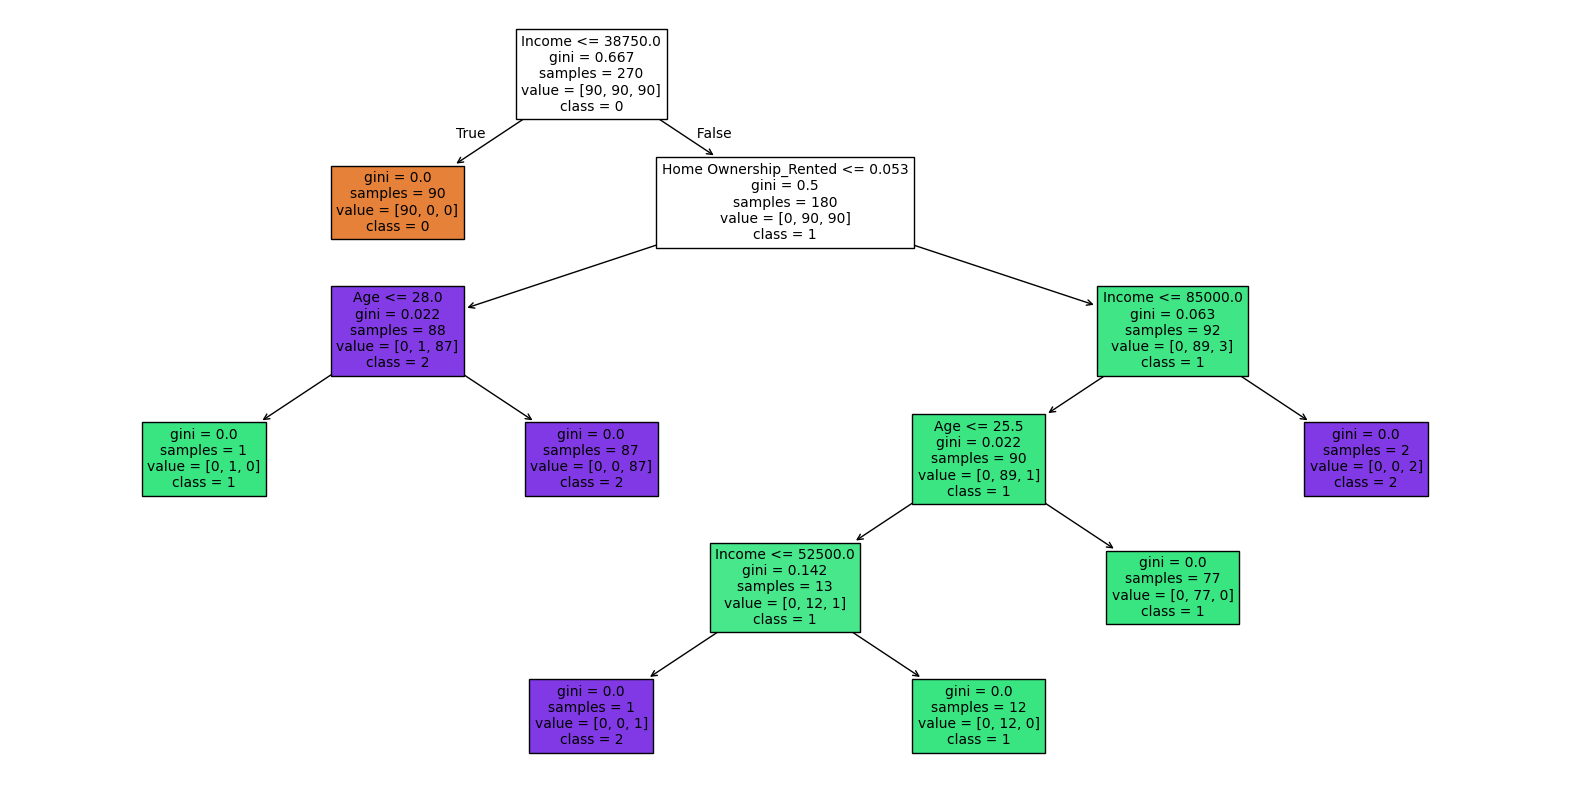

In [13]:
# Plotando a árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(score_tree, filled=True, feature_names=X_train_balanced.columns, class_names=['0', '1', '2'], fontsize=10)
plt.show()

# 6) Identifique as 2 principais features do modelo.


In [ ]:
# Indentificando as melhores features
feature_importances = pd.DataFrame(score_tree.feature_importances_,
                                   index=X_train_balanced.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print('\nImportância das features:\n', feature_importances)


Importância das features:
                        importance
Income                   0.531515
Home Ownership_Rented    0.456769
Age                      0.011716
Education                0.000000
Number of Children       0.000000
Gender_Male              0.000000
Marital Status_Single    0.000000


# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [23]:
# Treinando o modelo com as melhores features
X_train_balanced_features = X_train_balanced[['Income','Home Ownership_Rented']]
X_test_features = X_test[['Income','Home Ownership_Rented']]

score_tree_features = DecisionTreeClassifier(criterion='gini', random_state=0)
score_tree_features.fit(X_train_balanced_features, y_train_balanced)

DecisionTreeClassifier(random_state=0)

In [25]:
score_tree_pred = score_tree_features.predict(X_test_features)
classification_rep = classification_report(y_test, score_tree_pred)
print('\nRelatório de classificação:\n', classification_rep)


Relatório de classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.86      0.86      0.86         7
           2       0.96      0.96      0.96        23

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.94      0.94      0.94        33



In [21]:
score_tree_pred = score_tree.predict(X_test)
classification_rep = classification_report(y_test, score_tree_pred)
print('\nRelatório de classificação:\n', classification_rep)    


Relatório de classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.86      0.86      0.86         7
           2       0.96      0.96      0.96        23

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.94      0.94      0.94        33



Usando apenas as duas principais features, a acurácia foi de 94%, exatamente igual ao modelo com todas as features. As métricas de precision, recall e f1-score também ficaram praticamente iguais nos dois casos. Isso mostra que, mesmo com menos variáveis, o modelo manteve um ótimo desempenho. Como a base é pequena (164 registros), usar menos features pode até ajudar a evitar overfitting e deixar o modelo mais simples e rápido sem perder qualidade.

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

O modelo de árvore de decisão teve um desempenho muito superior ao Naive Bayes. Enquanto a árvore alcançou cerca de 94% de acurácia, o Naive Bayes ficou por volta de 60%. Isso acontece porque a árvore de decisão consegue considerar as relações entre as variáveis para criar as divisões, enquanto o Naive Bayes assume que todas as variáveis são independentes, o que nem sempre é verdade, especialmente em bases pequenas como essa. Por isso, nesse caso, a árvore conseguiu se ajustar melhor aos dados e apresentar resultados de avaliação bem mais altos.